In [2]:
# Authors:
# Freese, Julius <jufr23ac@student.cbs.dk>
# Haunberger, Vincent <viha23al@student.cbs.dk>
# Schröder, Fynn <fysc23ab@student.cbs.dk>

In [3]:
"""This notebook contains code for building content-based recommendation system models.
The models itself are implemented in the `cb_recommender.py` file. Each model is evaluated
using common evaluation metrics on our common test set.

Sections:
(1) Model 1: one-hot
(2) Model 2: TF-IDF
(3) Model 3: ada-002
(4) Model Evaluations
"""

'This notebook contains code for building content-based recommendation system models.\nThe models itself are implemented in the `cb_recommender.py` file. Each model is evaluated\nusing common evaluation metrics on our common test set.\n\nSections:\n(1) Model 1: one-hot\n(2) Model 2: TF-IDF\n(3) Model 3: ada-002\n(4) Model Evaluations\n'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from common.cb_recommender import (
    OHRecommender,
    TfidfRecommender,
    OAIRecommender,
)
from common.model_evaluation import (
    calculate_global_metrics,
    evaluate_recommendation
)
from common.data_loaders import (
    load_test_resp_eval_matrix,
    load_test_resp_eval_frame
)

In [5]:
test_matrix = load_test_resp_eval_matrix()
test_matrix.shape

loading responses data ...
loading items data ...
Loaded items: (6648, 14)


(50000, 6648)

In [6]:
def transform_dict_to_df(dict_):
    transformed_data = {}
    for key, value in dict_.items():
        ids = list(value.keys())
        scores = list(value.values())
        transformed_data[key] = [ids, scores]
    df = pd.DataFrame(transformed_data).T
    df.columns = ["recommended_ids", "scores"]
    return df

In [7]:
pred_data = test_matrix.copy()
pred_data = pred_data.head(5000)

## 'One-Hot' Embeddings Recommender

In [8]:
oh_recommender = OHRecommender()
oh_recommender.fit()

oh_recommendations = oh_recommender.recommend(pred_data, n=5)
# ~1min

Initialized `One-Hot-Embeddings Recommender`
loading items data ...
Loaded items: (6648, 14)
Created user embeddings: (5000, 51)
Calculated cosine similarity: (5000, 6648); now sorting ...


In [9]:
oh_recs = transform_dict_to_df(oh_recommendations)
oh_recs.head()

,recommended_ids,scores
10_4592_2024-03-23,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"
10_2069_2024-03-23,"[2894, 2879, 3104, 1264, 6268]","[0.9999999999999998, 0.9999999999999998, 0.999..."
19_6351_2024-03-06,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"
24_5517_2024-01-14,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"
30_1954_2024-05-02,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"


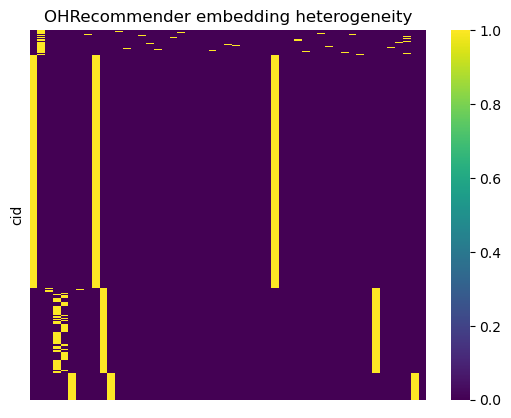

In [10]:
sns.heatmap(oh_recommender.data, yticklabels=False, xticklabels=False, cmap='viridis')
plt.title('OHRecommender embedding heterogeneity')
plt.show()

## 'Term frequency - inverse document frequency' Embeddings Recommender

In [11]:
tfidf_recommender = TfidfRecommender()
tfidf_recommender.fit()

tfidf_recommendations = tfidf_recommender.recommend(pred_data, n=5)

Initialized `Tf-idf Recommender`
Created user embeddings: (5000, 1001)
Calculated cosine similarity: (5000, 6648); now sorting ...


In [12]:
tfidf_recs = transform_dict_to_df(tfidf_recommendations)
tfidf_recs.tail()

,recommended_ids,scores
53276_3743_2024-04-16,"[0, 4437, 4436, 4435, 4434]","[0.0, 0.0, 0.0, 0.0, 0.0]"
53302_6351_2024-03-05,"[0, 4437, 4436, 4435, 4434]","[0.0, 0.0, 0.0, 0.0, 0.0]"
53316_4441_2024-02-15,"[0, 4437, 4436, 4435, 4434]","[0.0, 0.0, 0.0, 0.0, 0.0]"
53316_2908_2024-02-20,"[4664, 4697, 4718, 5735, 5295]","[0.9999999755766451, 0.9999999750367126, 0.999..."
53323_1439_2024-02-15,"[0, 4437, 4436, 4435, 4434]","[0.0, 0.0, 0.0, 0.0, 0.0]"


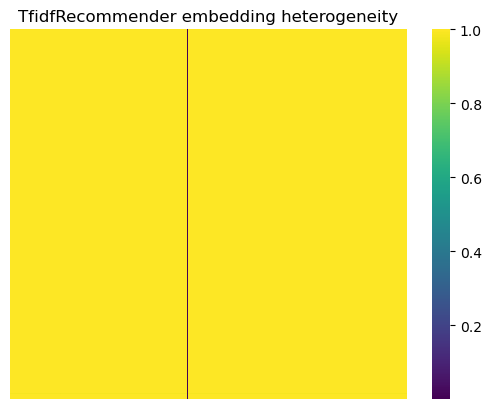

In [13]:
df_sim_tfidf = pd.DataFrame(
    cosine_similarity(tfidf_recommender.data),
    index=tfidf_recommender.data.index,
    columns=tfidf_recommender.data.index
)

sns.heatmap(df_sim_tfidf, yticklabels=False, xticklabels=False, cmap='viridis')
plt.title('TfidfRecommender embedding heterogeneity')
plt.show()

## 'OpenAI' Embeddings Recommender

In [14]:
oai_recommender = OAIRecommender(dotenv_path="/Users/vincenthaunberger/Desktop/openai_key.env")
oai_recommender.fit()

oai_recommendations = oai_recommender.recommend(pred_data, n=5)

Initialized `OpenAI Embeddings Recommender`
Created user embeddings: (5000, 1535)
Calculated cosine similarity: (5000, 6648); now sorting ...


In [15]:
oai_recs = transform_dict_to_df(oai_recommendations)
oai_recs.head()

,recommended_ids,scores
10_4592_2024-03-23,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"
10_2069_2024-03-23,"[3104, 2879, 4523, 2069, 5528]","[0.9250100204718961, 0.9237715508614973, 0.922..."
19_6351_2024-03-06,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"
24_5517_2024-01-14,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"
30_1954_2024-05-02,"[6381, 4106, 3030, 504, 5642]","[0.0, 0.0, 0.0, 0.0, 0.0]"


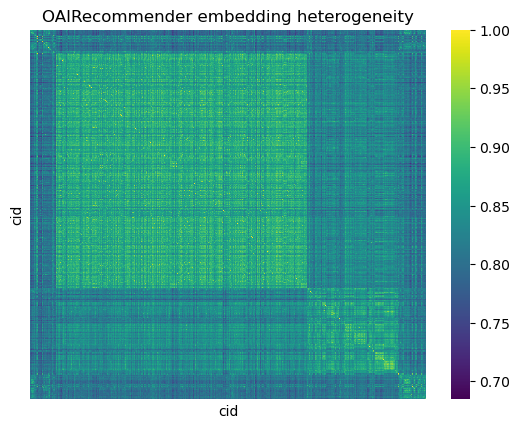

In [16]:
df_sim_oai = pd.DataFrame(
    cosine_similarity(oai_recommender.data),
    index=oai_recommender.data.index,
    columns=oai_recommender.data.index
)

sns.heatmap(df_sim_oai, yticklabels=False, xticklabels=False, cmap='viridis')
plt.title('OAIRecommender embedding heterogeneity')
plt.show()

# Model Evaluation

In [17]:
def transform_dict(dict_):
    transformed_data = {}
    for key, value in dict_.items():
        ids = list(value.keys())
        scores = list(value.values())
        transformed_data[key] = [ids, scores]
    return transformed_data

In [18]:
TOP_K = 200

print(test_matrix.shape)
test_matrix.head(2)

(50000, 6648)


,6381,5962,5245,967,1990,2008,1245,5365,2657,2802,...,1,1075,3769,2728,3325,2212,6596,5405,6195,2797
eid,,,,,,,,,,,,,,,,,,,,,
10_4592_2024-03-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10_2069_2024-03-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
oh_recommender = OHRecommender()
oh_recommender.fit()

oh_recommendations = oh_recommender.recommend(test_matrix, n=TOP_K)
oh_recs = transform_dict_to_df(oh_recommendations)
# took 1min

Initialized `One-Hot-Embeddings Recommender`
loading items data ...
Loaded items: (6648, 14)
Created user embeddings: (50000, 51)
Calculated cosine similarity: (50000, 6648); now sorting ...


In [20]:
tfidf_recommender = TfidfRecommender()
tfidf_recommender.fit()

tfidf_recommendations = tfidf_recommender.recommend(test_matrix, n=TOP_K)
tfidf_recs = transform_dict_to_df(tfidf_recommendations)
# took 25sec

Initialized `Tf-idf Recommender`
Created user embeddings: (50000, 1001)
Calculated cosine similarity: (50000, 6648); now sorting ...


In [21]:
oai_recommender = OAIRecommender()
oai_recommender.fit()

oai_recommendations = oai_recommender.recommend(test_matrix, n=TOP_K)
oai_recs = transform_dict_to_df(oai_recommendations)
# took 

Initialized `OpenAI Embeddings Recommender`
Created user embeddings: (50000, 1535)
Calculated cosine similarity: (50000, 6648); now sorting ...


In [23]:
test_frame = load_test_resp_eval_frame()
test_frame.head(2)

,uid,cid,Date,eid,prev_resp,future_resp
0,10,4592,2024-03-23,10_4592_2024-03-23,[],"[4592, 2069]"
1,10,2069,2024-03-23,10_2069_2024-03-23,[4592],[2069]


In [38]:
oh_evaluation = evaluate_recommendation(oh_recs, test_frame)

# Calculate global metrics for multiple k values
global_metrics_df = calculate_global_metrics(oh_evaluation)
print("Global metrics for OHRecommender:")
print(global_metrics_df)

# Calculate global metrics for multiple k values
global_metrics_df = calculate_global_metrics(oh_evaluation[oh_evaluation['prev_resp'].apply(len) > 0])
print("\nGlobal metrics for OHRecommender [filtered]:")
print(global_metrics_df)

Global metrics for OAIRecommender:
     Precision@k  Recall@k       MRR       MAP  Hit Rate  Coverage
10      0.001406  0.005011  0.004057  0.002459   0.01320  0.269054
20      0.001137  0.008105  0.004169  0.002599   0.01748  0.377104
50      0.001509  0.026888  0.004499  0.003218   0.04576  0.591062
100     0.000939  0.033468  0.004381  0.003269   0.05032  0.782063
200     0.000590  0.042036  0.004323  0.003291   0.05484  1.000000

Global metrics for OAIRecommender [filtered]:
     Precision@k  Recall@k       MRR       MAP  Hit Rate  Coverage
10      0.009014  0.007310  0.022067  0.012495  0.084267  0.267857
20      0.007457  0.012095  0.022816  0.013434  0.113220  0.373461
50      0.010150  0.041159  0.025017  0.017612  0.304835  0.588054
100     0.006317  0.051227  0.024186  0.017934  0.334062  0.781712
200     0.003931  0.063754  0.023723  0.018033  0.356050  1.000000


In [39]:
tfidf_evaluation = evaluate_recommendation(tfidf_recs, test_frame)

# Calculate global metrics for multiple k values
global_metrics_df = calculate_global_metrics(tfidf_evaluation)
print("Global metrics for TfidfRecommender:")
print(global_metrics_df)

# Calculate global metrics for multiple k values
global_metrics_df = calculate_global_metrics(tfidf_evaluation[tfidf_evaluation['prev_resp'].apply(len) > 0])
print("\nGlobal metrics for TfidfRecommender [filtered]:")
print(global_metrics_df)

Global metrics for OAIRecommender:
     Precision@k  Recall@k       MRR       MAP  Hit Rate  Coverage
10      0.000036  0.000128  0.000070  0.000044   0.00036  0.516013
20      0.000064  0.000456  0.000127  0.000072   0.00126  0.658007
50      0.001534  0.027330  0.002606  0.002072   0.06842  0.829902
100     0.001049  0.037395  0.002738  0.002220   0.08178  0.925817
200     0.000794  0.056628  0.002820  0.002340   0.10562  1.000000
Global metrics for OAIRecommender [filtered]:
     Precision@k  Recall@k       MRR       MAP  Hit Rate  Coverage
10      0.000191  0.000155  0.000421  0.000263  0.001912  0.516642
20      0.000321  0.000521  0.000710  0.000375  0.006419  0.658305
50      0.002305  0.009348  0.002283  0.000583  0.065146  0.829316
100     0.002267  0.018386  0.002121  0.000719  0.078530  0.925070
200     0.002215  0.035920  0.001852  0.000796  0.095739  1.000000


In [40]:
oai_evaluation = evaluate_recommendation(oai_recs, test_frame)

# Calculate global metrics for multiple k values
global_metrics_df = calculate_global_metrics(oai_evaluation)
print("Global metrics for OAIRecommender:")
print(global_metrics_df)

# Calculate global metrics for multiple k values
global_metrics_df = calculate_global_metrics(oai_evaluation[oai_evaluation['prev_resp'].apply(len) > 0])
print("\nGlobal metrics for OAIRecommender [filtered]:")
print(global_metrics_df)

Global metrics for OAIRecommender:
     Precision@k  Recall@k       MRR       MAP  Hit Rate  Coverage
10      0.003662  0.013052  0.012078  0.009961   0.02864  0.537857
20      0.002498  0.017807  0.012632  0.010524   0.03894  0.688049
50      0.001451  0.025855  0.012792  0.010816   0.05426  0.859830
100     0.001060  0.037794  0.012842  0.010925   0.07034  0.953123
200     0.000734  0.052315  0.012681  0.010950   0.08444  1.000000

Global metrics for OAIRecommender [filtered]:
     Precision@k  Recall@k       MRR       MAP  Hit Rate  Coverage
10      0.024420  0.019804  0.076841  0.063723  0.189702  0.537274
20      0.016751  0.027170  0.080609  0.067552  0.259765  0.687143
50      0.009754  0.039553  0.081644  0.069497  0.362879  0.859083
100     0.007146  0.057950  0.081958  0.070218  0.470773  0.952770
200     0.004915  0.079725  0.080799  0.070328  0.558181  1.000000
